Speed: 40
All block count: 5000
Success block rate 1.0
Success count rate 1.0

Speed: 60
All block count: 5000
Success block rate 1.0
Success count rate 1.0

Speed: 80
All block count: 5000
Success block rate 0.9976
Success count rate 0.993421052631579

Speed: 40
All block count: 5000
Success block rate 0.3876
Success count rate 0.4171779141104294

Speed: 60
All block count: 5000
Success block rate 0.7212
Success count rate 0.7229437229437229

Speed: 80
All block count: 5000
Success block rate 0.771
Success count rate 0.7733333333333333



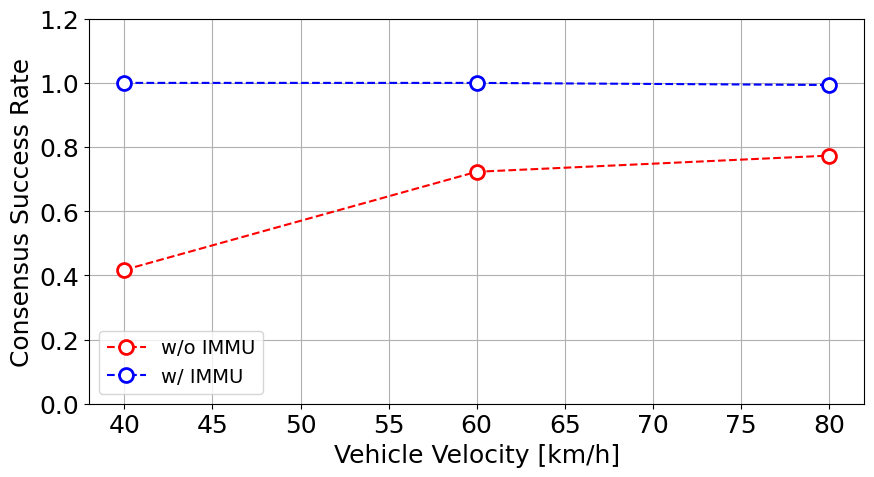

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt



def judge_success(validator_list,input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)


    validator_dfs = {}
    for validator_id in validator_list:
        validator_df_item = pd.read_csv(input_folder_path + str(validator_id) + "/consensus_folder.csv")
        validator_df_item = validator_df_item.replace('null', pd.NA)
        validator_dfs[str(validator_id)] = validator_df_item


    # 結果を格納するリスト
    result = []

    # idごとに処理を行う
    for _, row in proposer_df.iterrows():
        id_value = row['id']
        booth_list = ast.literal_eval(row['booth'])  # booth列の文字列をリストに変換
        now_result = True
        
        # boothの2つ目から始める
        if len(booth_list) > 1:
            for validator_id in booth_list[1:]:

                now_validator_df = validator_dfs[str(validator_id)]
                # idが一致する行を取得
                matching_row = now_validator_df[now_validator_df['id'] == id_value]
                
                if not matching_row.empty:
                    start_time_null = matching_row['start_time'].isna().values[0]
                    end_time_null = matching_row['end_time'].isna().values[0]
                    if start_time_null or end_time_null:
                        now_result = False
                        # print("id:", id_value, "validator_id:", validator_id, "start_time_null:", start_time_null, "end_time_null:", end_time_null) 
        else:
            now_result = False
        
        result.append(now_result)
    
    return result


def caluculate_success_rate(speed, success_list, input_folder_path):
    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)


    # count the number of successful and failed events
    success_block = 0
    failed_block = 0
    success_count = 0
    failed_count = 0

    # idごとに処理を行う
    for _, row in proposer_df.iterrows():
        id_value = row['id']
        if success_list[int(id_value)]:
            success_block += int(row["len_block_range"])
            success_count += 1
        else:
            failed_block += int(row["len_block_range"])
            failed_count += 1
            
    
    success_block_rate = success_block / (success_block + failed_block)
    success_count_rate = success_count / (success_count + failed_count)

        # print result
    print("Speed:", speed)
    print("All block count:", success_block + failed_block)
    print("Success block rate", success_block_rate)
    print("Success count rate", success_count_rate)
    print("")

    return success_block_rate, success_count_rate



def get_success_rate(speed, validator_list,input_folder_path):
    success_list = judge_success(validator_list, input_folder_path)
    success_block_rate, success_count_rate = caluculate_success_rate(speed, success_list, input_folder_path)

    return success_block_rate, success_count_rate
 


# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed_list = [40, 60, 80]
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
main_proposer_id = 1

validator_list = list(range(proposer_num, participant_size))


# bypass_route
success_block_rate_list_bypass_route = []
success_count_rate_list_bypass_route = []
for vehicle_speed in vehicle_speed_list:
    input_folder_path = result_csv_folder = "../../results/bypass_route/vs"  + str(vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(main_proposer_id) + "/"
    success_block_rate, success_count_rate = get_success_rate(vehicle_speed, validator_list, input_folder_path)
    success_block_rate_list_bypass_route.append(success_block_rate)
    success_count_rate_list_bypass_route.append(success_count_rate)

# no_bypass_route
success_block_rate_list_no_bypass_route = []
success_count_rate_list_no_bypass_route = []
for vehicle_speed in vehicle_speed_list:
    input_folder_path = result_csv_folder = "../../results/no_bypass_route/vs"  + str(vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(main_proposer_id) + "/"
    success_block_rate, success_count_rate = get_success_rate(vehicle_speed, validator_list, input_folder_path)
    success_block_rate_list_no_bypass_route.append(success_block_rate)
    success_count_rate_list_no_bypass_route.append(success_count_rate)

# 複数グラフ作成
plt.figure(figsize=(10, 5))
# メンバー変更なしの成功率のプロット
plt.plot(vehicle_speed_list, success_count_rate_list_no_bypass_route , marker='o', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='w/o IMMU', color="red")
# メンバー変更ありの成功率のプロット
plt.plot(vehicle_speed_list, success_count_rate_list_bypass_route , marker='o', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='w/ IMMU', color="blue")
# 軸の設定
plt.xlabel('Vehicle Velocity [km/h]', fontsize=18)
plt.ylabel('Consensus Success Rate', fontsize=18)
# 軸の目盛り
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Y軸の範囲
plt.ylim(0.0, 1.2)
# グリッド表示
plt.grid(True)
# 凡例の表示
plt.legend(fontsize=14)
# グラフの表示
plt.show()
